In [1]:
#importing important liberaries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# LOading the Data
df = pd.read_csv('/kaggle/input/baseball-player-salary-prediction/Player.csv')
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
# viewing Raw data
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# Dimension of data
df.shape

(322, 21)

In [5]:
# column data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [6]:
# Checking null values
df.isnull().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [7]:
#Droping NUll values
df.dropna(inplace = True)

# Statistical Analysis and Encode Variables

*** Statistical Data analysis ***

In [8]:

pd.set_option('precision',3)
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000
mean,403.643,107.829,11.620,54.745,51.487,41.114,7.312,2657.544,722.186,69.240,361.221,330.418,260.266,290.711,118.760,8.593,535.926
std,147.307,45.125,8.757,25.540,25.883,21.718,4.794,2286.583,648.200,82.198,331.199,323.368,264.056,279.935,145.081,6.607,451.119
min,19.000,1.000,0.000,0.000,0.000,0.000,1.000,19.000,4.000,0.000,2.000,3.000,1.000,0.000,0.000,0.000,67.500
25%,282.500,71.500,5.000,33.500,30.000,23.000,4.000,842.500,212.000,15.000,105.500,95.000,71.000,113.500,8.000,3.000,190.000
50%,413.000,103.000,9.000,52.000,47.000,37.000,6.000,1931.000,516.000,40.000,250.000,230.000,174.000,224.000,45.000,7.000,425.000
75%,526.000,141.500,18.000,73.000,71.000,57.000,10.000,3890.500,1054.000,92.500,497.500,424.500,328.500,322.500,192.000,13.000,750.000
max,687.000,238.000,40.000,130.000,121.000,105.000,24.000,14053.000,4256.000,548.000,2165.000,1659.000,1566.000,1377.000,492.000,32.000,2460.000


*** Categorical Variable Analysis ***

A    139
N    124
Name: League, dtype: int64


<AxesSubplot:ylabel='League'>

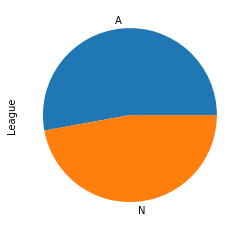

In [9]:
# League columns
leag = df.League.value_counts()
print(leag)
leag.plot.pie()


W    134
E    129
Name: Division, dtype: int64


<AxesSubplot:ylabel='Division'>

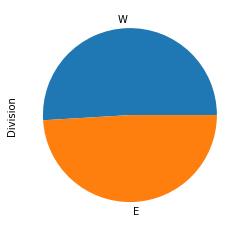

In [10]:
# Division column
div = df.Division.value_counts()
print(div)
div.plot.pie()


A    141
N    122
Name: NewLeague, dtype: int64


<AxesSubplot:ylabel='NewLeague'>

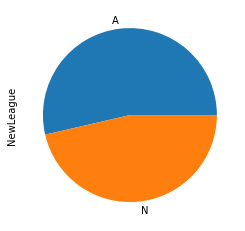

In [11]:
# For New League
Nleag = df.NewLeague.value_counts()
print(Nleag)
Nleag.plot.pie()


***Encode Categorical Variables ***

In [12]:
dummyCol = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummyCol.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [13]:
dummyCol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    uint8
 1   League_N     263 non-null    uint8
 2   Division_E   263 non-null    uint8
 3   Division_W   263 non-null    uint8
 4   NewLeague_A  263 non-null    uint8
 5   NewLeague_N  263 non-null    uint8
dtypes: uint8(6)
memory usage: 3.6 KB


# Preparing INPUT/OUTPUT Variables

***Input Variables***

In [14]:
XTemp = df.drop(['Unnamed: 0','Salary', 'League', 'Division', 'NewLeague'], axis=1)

X = pd.concat([XTemp, dummyCol[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    uint8
 17  Division_W   263 non-null    uint8
 18  NewLeague_N  263 non-null    uint8
dtypes: int64(16), uint8(3)
memory usage: 35.7 KB


*** Output Variable ***

In [15]:
y = df.Salary
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

# Ridge Regression

In [16]:
alphas = 10**np.linspace(10,-2,100)*0.00001
ridge = Ridge()
coeffs = []

In [17]:
scaler = StandardScaler() 
for a in alphas: 
    ridge.set_params(alpha=a) 
    ridge.fit(scaler.fit_transform(X), y) 
    coeffs.append(ridge.coef_) 

In [18]:
np.shape(coeffs)

(100, 19)

Text(0.5, 1.0, 'Ridge coefficients as a function of lambda(alpha)')

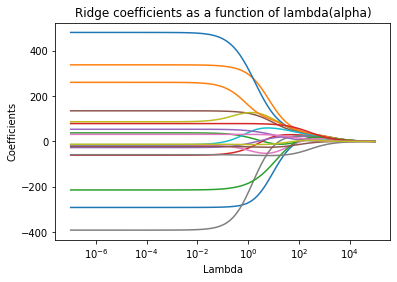

In [19]:
ax = plt.gca() 
ax.plot(alphas, coeffs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('Lambda') 
plt.ylabel('Coefficients') 
plt.title('Ridge coefficients as a function of lambda(alpha)')

In [20]:
pd.set_option('precision', 6)                              
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)  

In [21]:
def Ridge_Regression(alpha):
    scaler = StandardScaler()
    ridge = Ridge(alpha=alpha)
    ridge.fit(scaler.fit_transform(X_train),y_train)
    pred = ridge.predict(scaler.fit_transform(X_test))
    print(pd.Series(ridge.coef_,index=X.columns))
    print('Mean Squared Error: ', mean_squared_error(y_test, pred))

*** Ridge REgression Lambda 0 ***

In [22]:
Ridge_Regression(0)

AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64
Mean Squared Error:  117301.05503374558


*** Ridge REgression Lambda 5 ***

In [23]:
Ridge_Regression(5)

AtBat         -186.758092
Hits           173.418840
HmRun          -50.099122
Runs             4.095323
RBI             78.251223
Walks           91.208954
Years          -27.704779
CAtBat         -95.784064
CHits           82.427222
CHmRun          90.177878
CRuns           88.725783
CRBI           111.101186
CWalks         -31.741730
PutOuts        124.645919
Assists         22.109118
Errors         -17.617342
League_N        33.254373
Division_W     -60.591409
NewLeague_N    -16.244300
dtype: float64
Mean Squared Error:  104878.0719386757


*** Ridge REgression Lambda 10 ***

In [24]:
Ridge_Regression(10)

AtBat         -115.114722
Hits           118.410240
HmRun          -41.298884
Runs             9.186257
RBI             65.123912
Walks           80.074669
Years          -22.548468
CAtBat         -44.320918
CHits           61.057996
CHmRun          81.438854
CRuns           61.568147
CRBI            90.324791
CWalks         -10.664823
PutOuts        120.323863
Assists         11.855168
Errors         -14.112506
League_N        25.207460
Division_W     -61.002188
NewLeague_N     -8.507049
dtype: float64
Mean Squared Error:  104918.61068850197


*** Ridge REgression Lambda 100 ***

In [25]:
Ridge_Regression(100)

AtBat           3.911359
Hits           36.096360
HmRun           1.736680
Runs           19.611659
RBI            32.219132
Walks          43.972410
Years           8.496447
CAtBat         17.992839
CHits          32.545056
CHmRun         41.512925
CRuns          33.271936
CRBI           41.571334
CWalks         25.535833
PutOuts        75.761366
Assists        -2.475953
Errors         -0.792667
League_N        8.214298
Division_W    -41.608368
NewLeague_N     5.211955
dtype: float64
Mean Squared Error:  100357.25470322548


*** Ridge REgression Lambda 1000 ***

In [26]:
Ridge_Regression(1000)

AtBat          11.956682
Hits           15.187035
HmRun           9.701107
Runs           13.289640
RBI            16.436589
Walks          16.447342
Years          11.050104
CAtBat         15.191973
CHits          17.062696
CHmRun         17.621604
CRuns          17.492497
CRBI           18.394279
CWalks         15.813365
PutOuts        19.901497
Assists        -0.223363
Errors          1.292733
League_N        0.715848
Division_W     -8.982214
NewLeague_N     0.784509
dtype: float64
Mean Squared Error:  114498.45661953154


*** Ridge REgression Lambda 10^10 ***

In [27]:
Ridge_Regression(10**10)

AtBat          2.526133e-06
Hits           2.826091e-06
HmRun          2.174902e-06
Runs           2.632138e-06
RBI            3.183658e-06
Walks          2.941154e-06
Years          2.478179e-06
CAtBat         3.213788e-06
CHits          3.432349e-06
CHmRun         3.435819e-06
CRuns          3.522298e-06
CRBI           3.602930e-06
CWalks         3.216811e-06
PutOuts        2.851209e-06
Assists       -4.856786e-08
Errors         1.736624e-07
League_N      -1.637144e-07
Division_W    -1.015188e-06
NewLeague_N   -1.325154e-07
dtype: float64
Mean Squared Error:  172862.2200557664


# Cross Validation - RidgeCV

***RidgeCV (cv=none)***

In [28]:
scaler = StandardScaler()
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(scaler.fit_transform(X_train), y_train)
ridgecv.alpha_ 

70.54802310718645

*** RidgeCV (cv=5)***

In [29]:
scaler = StandardScaler()
ridgecv = RidgeCV(alphas=alphas, cv = 5)
ridgecv.fit(scaler.fit_transform(X_train), y_train)
ridgecv.alpha_ 

93.26033468832199

***RidgeCV (cv = 10)***

In [30]:
scaler = StandardScaler()
ridgecv = RidgeCV(alphas=alphas, cv = 10)
ridgecv.fit(scaler.fit_transform(X_train), y_train)
ridgecv.alpha_ 

215.44346900318826

# Optimal Rigid Regression

In [31]:
scaler = StandardScaler()
opt_ridge = Ridge(alpha=ridgecv.alpha_) 
opt_ridge.fit(scaler.fit_transform(X_train), y_train) 
pred = opt_ridge.predict(scaler.fit_transform(X_test))
mean_squared_error(y_test, pred)

99927.59735966552

In [32]:
opt_ridge.fit(X,y)
pd.Series(opt_ridge.coef_, index = X.columns)

AtBat          -2.131693
Hits            7.609983
HmRun           2.357328
Runs           -1.956615
RBI            -0.149830
Walks           6.049360
Years          -1.913856
CAtBat         -0.181229
CHits           0.103239
CHmRun         -0.176791
CRuns           1.565492
CRBI            0.788984
CWalks         -0.787067
PutOuts         0.291609
Assists         0.379783
Errors         -2.890302
League_N        8.754551
Division_W    -26.039641
NewLeague_N     5.471489
dtype: float64

# Lasso Regression

In [33]:
lasso = Lasso(max_iter = 100000)
coefs = []
scaler = StandardScaler()

In [34]:
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scaler.fit_transform(X_train), y_train)
    coefs.append(lasso.coef_)

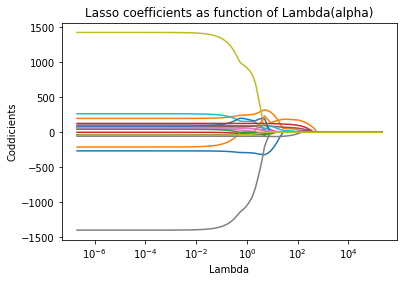

In [35]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Coddicients')
plt.title('Lasso coefficients as function of Lambda(alpha)')
plt.show()

# LassoCV

*** LassoCV - cv = 10 ***

In [36]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(scaler.fit_transform(X_train), y_train)

LassoCV(cv=10, max_iter=100000)

In [37]:
lassocv.alpha_

27.503283261878394

# Optimal Lasso

In [38]:
lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(scaler.fit_transform(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scaler.fit_transform(X_test)))

106183.7169261195

In [39]:
pd.Series(lasso.coef_, index=X.columns) 

AtBat            0.000000
Hits            50.246197
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.794424
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.441152
CRuns            0.000000
CRBI           181.336557
CWalks           0.000000
PutOuts        110.307327
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -44.530872
NewLeague_N      0.000000
dtype: float64

*** Coefficient !=0 ***

In [40]:
pd.Series(lasso.coef_[lasso.coef_ !=0], index=X.columns[lasso.coef_ !=0])

Hits           50.246197
Walks          66.794424
CHmRun         19.441152
CRBI          181.336557
PutOuts       110.307327
Division_W    -44.530872
dtype: float64

# Principle Components Analysis

*** Import Liberaries ***

In [41]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

*** Principle COmponents ***

In [42]:
pca = PCA()
x_pca_reduced = pca.fit_transform(scale(X))
print(pca.components_.shape)

(19, 19)


In [43]:
pd.DataFrame(pca.components_.T).loc[:4,:4]

,0,1,2,3,4
0,0.198290,-0.383784,0.088626,0.031967,0.028117
1,0.195861,-0.377271,0.074032,0.017982,-0.004652
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299


***Principal Components Variance Explained***

In [44]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

*** Implementing PCA ***

[]

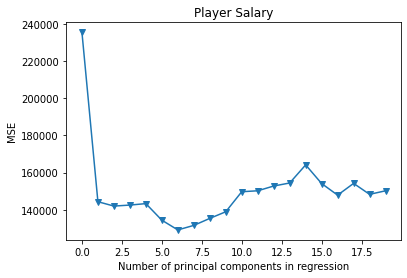

In [45]:
pca_t = PCA() 

X_train_reduced_pca = pca_t.fit_transform(scale(X_train)) 

n = len(X_train_reduced_pca) 

kfold10 = KFold(n_splits=10)

lm_regr = LinearRegression()

mse = []                                                               

tr_score = -1*cross_val_score(lm_regr, np.ones((n,1)),y_train, cv=kfold10, scoring='neg_mean_squared_error').mean()
    
mse.append(tr_score) 

for i in np.arange(1, 20): 
    tr_score = -1*cross_val_score(lm_regr, X_train_reduced_pca[:,:i], y_train, cv=kfold10, scoring='neg_mean_squared_error').mean() 
    mse.append(tr_score) 

plt.plot(mse, '-v') 
plt.xlabel('Number of principal components in regression') 
plt.ylabel('MSE') 
plt.title('Player Salary') 
plt.xlim(xmin=-1); 
plt.plot()

In [46]:
# MSE for Each Component
mse_each_comp=pd.Series(np.array(mse).flatten(), index = np.arange(1,21)) 
mse_each_comp

1     235406.619100
2     144310.329851
3     141961.097915
4     142493.549431
5     143287.577720
6     134376.466736
7     129143.405002
8     131571.376294
9     135335.186049
10    138904.079492
11    149674.333623
12    150179.569822
13    152739.781510
14    154371.214873
15    164099.596798
16    154067.909113
17    147843.866699
18    154154.156968
19    148268.507015
20    150176.362589
dtype: float64

In [47]:
# Minimum MSE
np.amin(mse_each_comp)

129143.40500200144

In [48]:
# Regression MOdel with reduced Component
X_test_reduced_pca = pca_t.transform(scale(X_test))[:,:7] 

regr = LinearRegression() 

regr.fit(X_train_reduced_pca[:,:7], y_train) 

pred = regr.predict(X_test_reduced_pca) 

mean_squared_error(y_test, pred) 

111994.42273636986

In [49]:
regr.coef_

array([111.65854316, -31.45724128,  29.39674508, -27.26877462,
       -94.69732568,  96.48700437, -49.67311542])